## Answers to Descriptive Questions

### 1) What is a data warehouse and what is its purpose?
A data warehouse is a management system designed to store and manage organizational data. It allows organizations to collect data from various sources and store it in a central location. A data warehouse helps organizations analyze their data and make informed decisions. The applications of a data warehouse include data analysis, reporting, and decision support.


### 2) What is the difference between a data warehouse and a database?
A data warehouse and a database are both data management systems, but they have fundamental differences. A database is a management system designed to store and manage data in real-time. In contrast, a data warehouse is designed to store and manage historical data and analyze it. Data warehouses are typically used for analysis and reporting, while databases are used for daily operations.
      
### 3) What are the steps of data preprocessing, and explain each one?

- Data collection: Collecting data from various sources.
- Data cleaning: Removing incorrect, duplicate, or incomplete data.
- Data transformation: Converting data into a suitable format.
- Data reduction: Reducing the size of the data while preserving its integrity.
- Data integration: Combining data from various sources into a single dataset.

### 4) Briefly explain how a decision tree works?
A decision tree is a machine learning model that uses a tree-like structure to classify data. It works by dividing the data into subsets based on the values of the input features. Each internal node in the tree represents a feature or attribute, and each leaf node represents a class label or predicted value. The decision tree algorithm starts at the root node and moves down the tree, making decisions based on the input features until it reaches a leaf node and makes a prediction.

### 5) Briefly explain how the KNN algorithm works?
The KNN algorithm is a machine learning model that classifies new data based on the majority vote of its nearest neighbors. It works by calculating the distance between the new data and the existing data, and selecting the K nearest neighbors. The algorithm then predicts the class label of the new data based on the majority vote of the K nearest neighbors.

### 6) What are the approaches to evaluating classification models?
- Accuracy: The proportion of correctly classified instances to the total number of instances.
- Precision: The proportion of true positives to the total number of predicted positive instances.
- Recall: The proportion of true positives to the total number of actual positive instances.
- F1 Score: The harmonic mean of precision and recall.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [ ]:
# Checking missing values
missing_values=pd.DataFrame(df.isna().sum()).reset_index()
missing_values=missing_values.rename(columns={'index':'column',0:"no_of_missing_values"})
missing_values

,column,no_of_missing_values
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,0
9,day,0


In [ ]:
# Checking missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# Since there are no missing values, no need for handling them

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
# One-hot encode categorical variables
data_preprocessed = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [ ]:
# Normalize numerical variables
scaler = StandardScaler()
data_preprocessed[numerical_columns] = scaler.fit_transform(data_preprocessed[numerical_columns])

In [ ]:
# Display the first few rows of the preprocessed dataset
print(data_preprocessed.head())

# Check the descriptive statistics of the preprocessed data
desc_stats = data_preprocessed.describe()
print(desc_stats)


      age  balance     day  duration  campaign   pdays  previous  \
0  1.4915   0.2525 -1.2657    1.9302   -0.5542 -0.4812   -0.3633   
1  1.2397  -0.4600 -1.2657    3.1546   -0.5542 -0.4812   -0.3633   
2 -0.0195  -0.0802 -1.2657    2.9299   -0.5542 -0.4812   -0.3633   
3  1.1557   0.2938 -1.2657    0.5964   -0.5542 -0.4812   -0.3633   
4  1.0718  -0.4169 -1.2657    0.8672   -0.1868 -0.4812   -0.3633   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0            False             False          False           False   
1            False             False          False           False   
2            False             False          False           False   
3            False             False          False           False   
4            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        False              False         False        False           False   
1   

In [ ]:
corr_matrix = data_preprocessed.corr()

### Observation
Based on the diagram below, since no significant correlation is observed between different features, dimensionality reduction is not considered. However, by applying dimensionality reduction and removing some columns, different results can be obtained in the model's performance.


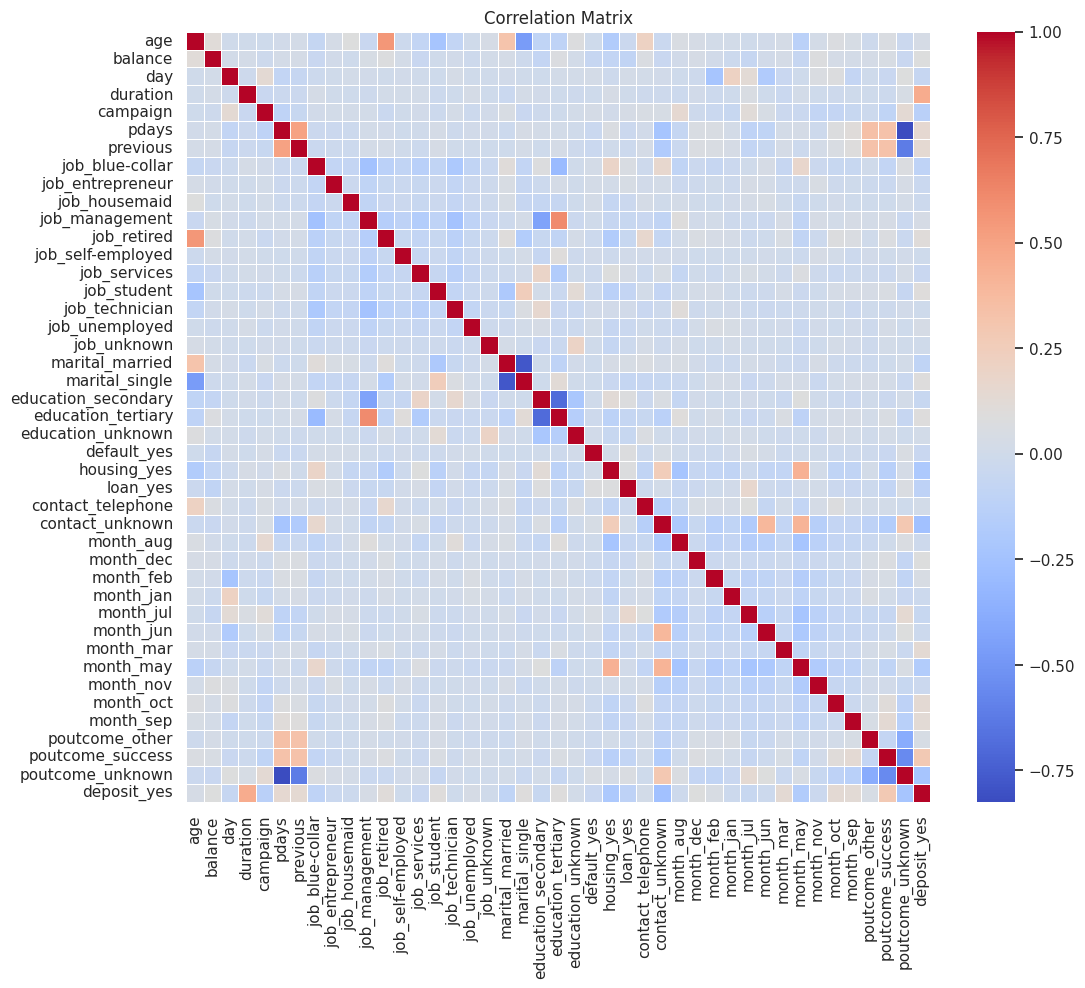

In [ ]:
# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



---



### Divide the preprocessed dataset into two parts: 70% for training and 30% for testing.

In [ ]:
X = data_preprocessed.drop('deposit_yes', axis=1)
y = data_preprocessed['deposit_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the decision tree algorithm on the training data and evaluate its performance on the testing data.


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)



### Train the K-Nearest Neighbors (KNN) algorithm on the training data and evaluate its performance on the testing data.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


In [ ]:
tree_metrics = evaluate_model(y_test, y_pred_tree)
knn_metrics = evaluate_model(y_test, y_pred_knn)

In [ ]:
# Display the results
print("Decision Tree Metrics:")
for key, value in tree_metrics.items():
    if key != 'Confusion Matrix':
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}:\n{value}")

print("\nK-Nearest Neighbors Metrics:")
for key, value in knn_metrics.items():
    if key != 'Confusion Matrix':
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}:\n{value}")


Decision Tree Metrics:
Accuracy: 0.7871
Precision: 0.7790
Recall: 0.7766
F1 Score: 0.7778
Confusion Matrix:
[[1388  354]
 [ 359 1248]]

K-Nearest Neighbors Metrics:
Accuracy: 0.8131
Precision: 0.8216
Recall: 0.7797
F1 Score: 0.8001
Confusion Matrix:
[[1470  272]
 [ 354 1253]]


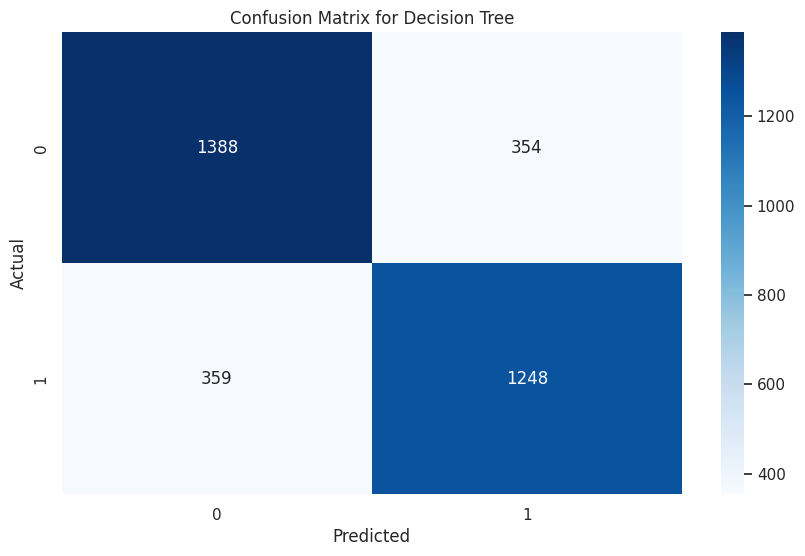

In [ ]:
# Confusion Matrix Visualization for Decision Tree
plt.figure(figsize=(10, 6))
sns.heatmap(tree_metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


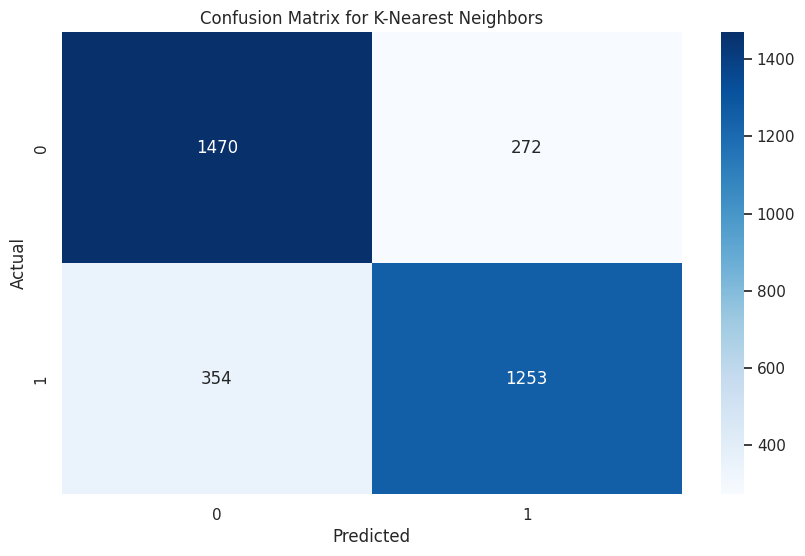

In [ ]:
# Confusion Matrix Visualization for KNN
plt.figure(figsize=(10, 6))
sns.heatmap(knn_metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Investigate cross-validation and repeat questions 8 and 9 with k = 5.


In [ ]:
# Perform cross-validation (K=5, K=9)
from sklearn.model_selection import cross_val_score

# Cross-validation for K=5
knn_cv_5 = KNeighborsClassifier(n_neighbors=5)
cv_scores_5 = cross_val_score(knn_cv_5, X, y, cv=5)

# Cross-validation for K=9
knn_cv_9 = KNeighborsClassifier(n_neighbors=9)
cv_scores_9 = cross_val_score(knn_cv_9, X, y, cv=5)

print(f"Cross-validation scores for K=5: {cv_scores_5}")
print(f"Mean cross-validation score for K=5: {cv_scores_5.mean():.4f}")

print(f"Cross-validation scores for K=9: {cv_scores_9}")
print(f"Mean cross-validation score for K=9: {cv_scores_9.mean():.4f}")

Cross-validation scores for K=5: [0.70577698 0.7268249  0.77688172 0.81899642 0.79749104]
Mean cross-validation score for K=5: 0.7652
Cross-validation scores for K=9: [0.7044335  0.71876399 0.78808244 0.83064516 0.8046595 ]
Mean cross-validation score for K=9: 0.7693



### Cross-Validation Report
   - In both models, the data was divided into two parts: test and training, with percentages of 30% and 70%, respectively.

   - Cross-validation is a method for evaluating the performance of machine learning models that is used to prevent overfitting.
    In this method, the data is divided into several parts, and the model is trained and evaluated multiple times. Each time, one part is used for evaluation and the rest for training.
    Finally, the average of the results of these evaluations is reported as the model's performance.

   - The accuracy of the two models based on different k values is shown in the diagram below.


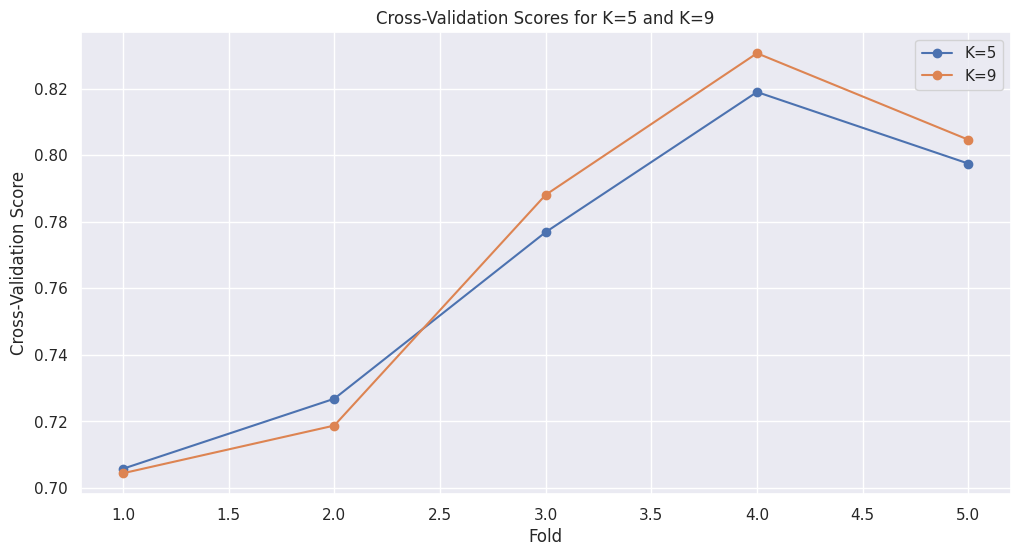

In [ ]:
# Plotting cross-validation results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), cv_scores_5, label='K=5', marker='o')
plt.plot(range(1, 6), cv_scores_9, label='K=9', marker='o')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for K=5 and K=9')
plt.legend()
plt.grid(True)
plt.show()